In [125]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [126]:
data = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')

#select_feature=['roundnes','MajorAxisLength']
select_feature=['Area', 'Perimeter']
select_class=['BOMBAY','CALI']
select_eta=0.0001
select_epoch=200
select_mse_thre=0.001
select_bias=True

filter_data = data[data['Class'].isin(select_class)]
X= filter_data[select_feature]
y= filter_data['Class']
X = (X - X.min()) / (X.max() - X.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [98]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'roundnes',
       'Class'],
      dtype='object')

***Perceptron learning algorithm
***

In [106]:
"""from sklearn.metrics import mean_squared_error, accuracy_score
class Adaline:
    def __init__(self, select_eta, select_epoch, select_mse_thre,select_bias):
        self.select_eta = select_eta
        self.select_epoch=select_epoch
        self.select_mse_thre=select_mse_thre
        self.select_bias=select_bias

    def act_linear(self,x):
      return x

    def fit(self, X, y):
        # Initialize the weights and Add_bias
        if self.select_bias:
           X = np.c_[np.ones(X.shape[0]), X]
        else:
           X = np.c_[np.zeros(X.shape[0]), X]

        self.weights = np.random.rand(X.shape[1])
        mse_list = []

        for i in range(self.select_epoch):

            net_value = np.dot(X, self.weights)

            predic_output =self.act_linear(net_value)
            error = y - predic_output

            mse = mean_squared_error(y, predic_output)
            mse_list.append(mse)

           # mse = np.mean(error ** 2)
            #mse_list.append(mse)

            # Update the weights
            self.weights += self.select_eta * np.dot(X.T, error)

            # if MSE threshold found
            if mse < self.select_mse_thre:
                break

        return mse_list

    def predict(self, X):
        # Add bias term to the features
        if self.select_bias:
          X = np.c_[np.ones(X.shape[0]), X]
        else:
          X = np.c_[np.zeros(X.shape[0]), X]

        # Calculate the net value
        net_value = np.dot(X, self.weights)
        net_value = np.where(net_value >= 0.5, 1, 0)

        # Calculate the actual output
        predic_output =self.act_linear(net_value)
        return predic_output


# Train the model
model = Adaline(0.001,70,0.001,True)
mse_list = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

final_mse = mse_list[-1]
print(f'Final Mean Squared Error for train (MSE): {final_mse}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy test: {accuracy * 100:.2f}%')"""

Final Mean Squared Error for train (MSE): 0.06883899101331488
Accuracy test: 100.00%


In [127]:
class Adaline:
    def __init__(self, select_eta, select_epoch, select_mse_thre, select_bias):
        self.select_eta = select_eta
        self.select_epoch = select_epoch
        self.select_mse_thre = select_mse_thre
        self.select_bias = select_bias

    def act_linear(self, x):
        return x

    def calculate_mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def calculate_accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def fit(self, X, y):
        # Initialize the weights and Add_bias
        if self.select_bias:
            X = np.c_[np.ones(X.shape[0]), X]
        else:
            X = np.c_[np.zeros(X.shape[0]), X]

        self.weights = np.random.rand(X.shape[1])
        mse_list = []

        for i in range(self.select_epoch):
            net_value = np.dot(X, self.weights)
            predic_output = self.act_linear(net_value)
            error = y - predic_output

            mse = self.calculate_mse(y, predic_output)
            mse_list.append(mse)

            self.weights += self.select_eta * np.dot(X.T, error)

            # if MSE threshold found
            if mse < self.select_mse_thre:
                break

        return mse_list

    def predict(self, X):
        # Add bias term to the features
        if self.select_bias:
            X = np.c_[np.ones(X.shape[0]), X]
        else:
            X = np.c_[np.zeros(X.shape[0]), X]

        # Calculate the net value
        net_value = np.dot(X, self.weights)
        net_value = np.where(net_value >= 0.5, 1, 0)

        # Calculate the actual output
        predic_output = self.act_linear(net_value)
        return predic_output


In [128]:
# Train the model
model = Adaline(0.01, 100, 0.01, True)
mse_list = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

final_mse = mse_list[-1]
print(f'Final Mean Squared Error for train (MSE): {final_mse}')

accuracy = model.calculate_accuracy(y_test, y_pred)
print(f'Accuracy test: {accuracy * 100:.2f}%')

Final Mean Squared Error for train (MSE): 0.009922498459610721
Accuracy test: 100.00%


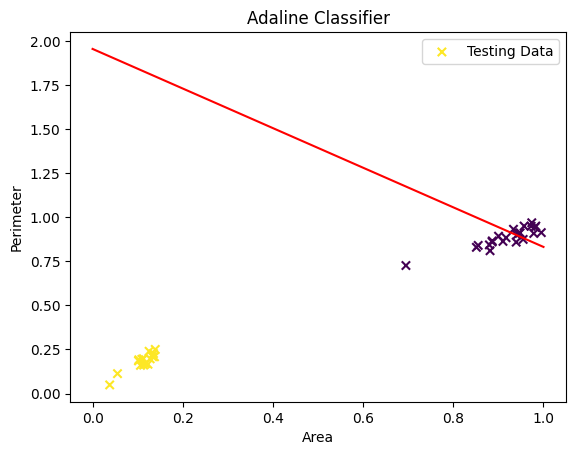

In [124]:
def plot():

  #plt.scatter(X_train['Area'], X_train['Perimeter'], c=y_train, cmap='viridis', label='Training Data')

  # Scatter testing data
  plt.scatter(X_test['Area'], X_test['Perimeter'], c=y_test, cmap='viridis', marker='x', label='Testing Data')

  # Draw the decision boundary line
  w1, w2 = model.weights[1:]
  b = model.weights[0]
  x_line = np.linspace(np.min(X_train['Perimeter']), np.max(X_train['Perimeter']), num=100)
  y_line = -(w1 * x_line + b) / w2

  plt.plot(x_line, y_line, color='red')

  plt.xlabel('Area')
  plt.ylabel('Perimeter')
  plt.title('Adaline Classifier')
  plt.legend()
  return plt.show()

plot()

***test***

In [117]:
# sample features
sample_features = np.array([[0.885487133728734, 509.410076766318], [0.850974352963791, 353.577349087887]])

class_ids = model.predict(sample_features)

print("Net Value:", np.dot(np.c_[np.ones(sample_features.shape[0]), sample_features], model.weights))

print("Actual Output:", model.act_linear(np.dot(np.c_[np.ones(sample_features.shape[0]), sample_features], model.weights)))

print("Class IDs:",class_ids)

accuracy = model.calculate_accuracy(y_test, y_pred)
print(f'Accuracy test: {accuracy * 100:.2f}%')


Net Value: [-249.73089769 -173.15492898]
Actual Output: [-249.73089769 -173.15492898]
Class IDs: [0 0]
Accuracy test: 100.00%


***evaluate***

In [118]:
def calculate_confusion_matrix(actual, predicted):
    tp = np.sum((actual == 1) & (predicted == 1))
    tn = np.sum((actual == 0) & (predicted == 0))
    fp = np.sum((actual == 0) & (predicted == 1))
    fn = np.sum((actual == 1) & (predicted == 0))
    return tp, tn, fp, fn

tp, tn, fp, fn = calculate_confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


Confusion Matrix:
True Positives (TP): 17
True Negatives (TN): 23
False Positives (FP): 0
False Negatives (FN): 0
